# Unit 3 - Proportional, Integral and Derivative (PID) Controllers

# Objectves
- In previous Unit saw that proportional controllers are sometimes able to meet design requirements (they can increase the performance of a system)
- However proportional controllers typically have large steady state errors (which limits their usefulness)
- Integral control can eliminate steady state errors while still keeping the desired performance
- Derivative control can increase the performance of a system (reduce tracking errors)
- The main strength of PID control is that it allows for intuitive tuning (this is probably the reason for the popularity of PID control)
- 50\% of industrial controllers are PID controllers (Ogata 2010)

# What is a Proportional Plus Integral Plus Derivative (PID) controller?
$$
\begin{align*}
u_K(t) &= K(t)*\varepsilon(t) \\
 &= \underbrace{K_p \varepsilon_m(t)}_{\substack{\text{Proportional} \\ \text{Control} \\ \text{Action}}} + \underbrace{K_i \int_0^{t}\varepsilon_m(\tau) d\tau}_{\substack{\text{Integral} \\ \text{Control} \\ \text{action}}}+ \underbrace{ K_d \frac{d}{dt} \varepsilon_m(t)}_{\substack{\text{Derivative} \\ \text{Control} \\ \text{action}}}
\end{align*}
$$

There are 3 "tuning knobs": $K_p$, $K_i$ and $K_d$. 
- Somehow we must pick a suitable value for each of these parameters. 
- By understanding how each parameter affects the closed-loop system we can tune the controller intuitively.
- Advantage: no need for a model!

In Laplace domain:
$$
\begin{align*}
U_K(s) &= K(s)\mathcal{E}_m(s) \\
 &= K_p \mathcal{E}_m(s)  + \frac{K_i}{s} \mathcal{E}_m(s)  + K_d \mathcal{E}_m(s)s
\end{align*}
$$

![PID feedback loop](PIDcontrolLoop.jpg "PID feedback loop")

# The Intuition Behind PID Controllers



# Start with Proportional Control

- Choose a value for $K_p$ to meet design requirements. If you have a model for the system, can use Root Locus Plots. 
- If design requirements cannot be met using just a proportional controller, add a derivative controller
- If design requirements are met using either P or PD controllers, then check the steady state error. If there is an error, add an integral controller. 

# Integral Control

- output of controller is proportional to the accumulation of errors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct

P = ct.tf(1, [1, 2, 10]) 
K = ct.tf(3,1)
T = P*K/(1+P*K)
S = 1/(1+P*K)

N = 100
t = np.linspace(0,10,N)
t,y = ct.step_response(T,T=t)
t,epsilon = ct.step_response(S,T=t)


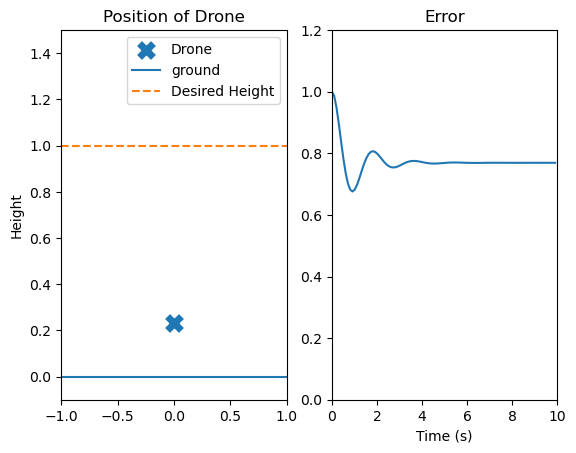

In [2]:

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Control of Drone', artist='Matplotlib',
                comment='visualize error when using proportional control')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1,2)

# Update the frames for the movie
with writer.saving(fig, "proportional_control_error.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y[ii], s=100, marker='x', linewidth=5, label='Drone' )
        ax[0].set_ylim(-0.1,1.5)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].plot(t[0:ii], epsilon[0:ii])
        ax[1].set_xlim(0,10)
        ax[1].set_ylim(0,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        
        writer.grab_frame()

In [3]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_control_error.mp4" type="video/mp4">
</video></div>""")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct

In [6]:
P = ct.tf(1, [1, 2, 10]) 
Kp = 3
K = ct.tf(Kp,1)
T = P*K/(1+P*K)
S = 1/(1+P*K)

N = 100
duration = 6
t = np.linspace(0,duration,N)
t,y = ct.step_response(T,T=t)
t,epsilon = ct.step_response(S,T=t)

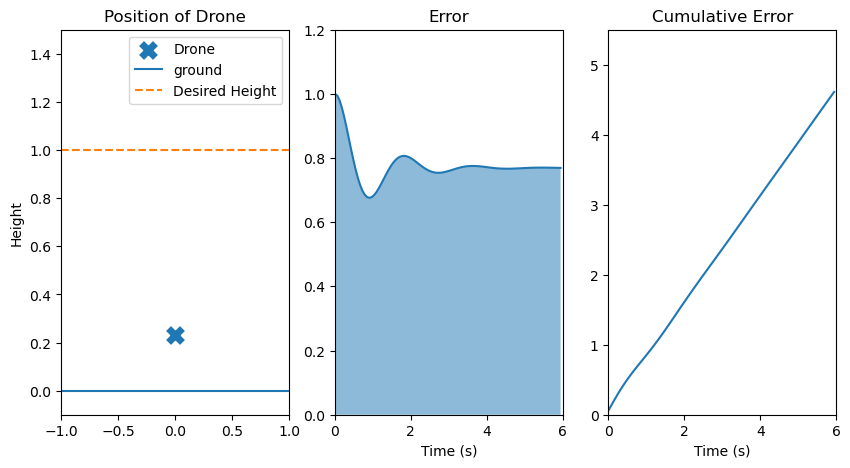

In [12]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Control of Drone', artist='Matplotlib',
                comment='visualize cumulative error when using proportional control')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig, ax = plt.subplots(1,3, figsize=(10,5))
with writer.saving(fig, "proportional_control_cumulative_error.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y[ii], s=100, marker='x', linewidth=5, label='Drone' )
        ax[0].set_ylim(-0.1,1.5)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].fill_between(t[0:ii], epsilon[0:ii], alpha=0.5)
        ax[1].plot(t[0:ii], epsilon[0:ii])
        ax[1].set_xlim(0,duration)
        ax[1].set_ylim(0,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        ax[2].clear()
        ax[2].plot(t[0:ii], np.cumsum(epsilon[0:ii])*duration/N)
        ax[2].set_xlim(0,duration)
        ax[2].set_ylim(0,5.5)
        ax[2].set_title('Cumulative Error')
        ax[2].set_xlabel('Time (s)')
        
        writer.grab_frame()

In [4]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_control_cumulative_error.mp4" type="video/mp4">
</video></div>""")

# Add Integral Action to Controller

- Will apply positive force on actuator if cumulative sum of errors is positive
- Will apply negative force on actuator if cumulative sum of errors is negative

In [14]:
Ki = 20 #20, #10 #5 #2  # choose gain for integral action
K = ct.tf(Kp,1) + ct.tf(Ki,[1, 0])  # This is the controller with proportional and integral action
T = P*K/(1+P*K)
S = 1/(1+P*K)

N = 300
duration = 45
t = np.linspace(0,duration,N)
t,y = ct.step_response(T,T=t)
t,epsilon = ct.step_response(S,T=t)

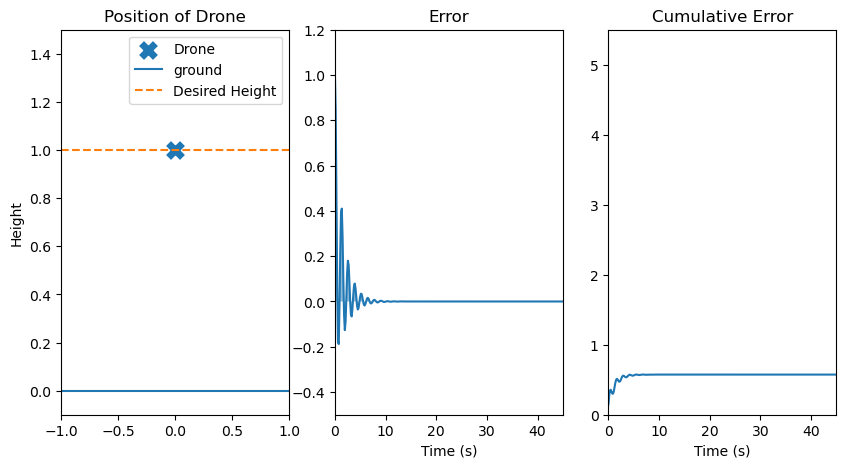

In [15]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Plus Integral Control of Drone', artist='Matplotlib',
                comment='visualize cumulative error when using proportional plus integral control')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig, ax = plt.subplots(1,3, figsize=(10,5))
with writer.saving(fig, "proportional_plus_integral_control_cumulative_error_K20.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y[ii], s=100, marker='x', linewidth=5, label='Drone' )
        ax[0].set_ylim(-0.1,1.5)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].fill_between(t[0:ii], epsilon[0:ii], alpha=0.5)
        ax[1].plot(t[0:ii], epsilon[0:ii])
        ax[1].set_xlim(0,duration)
        ax[1].set_ylim(-0.5,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        ax[2].clear()
        ax[2].plot(t[0:ii], np.cumsum(epsilon[0:ii])*duration/N)
        ax[2].set_xlim(0,duration)
        ax[2].set_ylim(0,5.5)
        ax[2].set_title('Cumulative Error')
        ax[2].set_xlabel('Time (s)')
        
        writer.grab_frame()

In [5]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_integral_control_cumulative_error_K2.mp4" type="video/mp4">
</video></div>""")

In [6]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_integral_control_cumulative_error_K5.mp4" type="video/mp4">
</video></div>""")

In [7]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_integral_control_cumulative_error_K10.mp4" type="video/mp4">
</video></div>""")

In [9]:
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_integral_control_cumulative_error_K20.mp4" type="video/mp4">
</video></div>""")

# Steady State Errors

# What is the steady state error for a proportional controller? 

Notes: 
- $r(t)$ is a unit step when we do these calculations.
- $P(s) = \frac{B(s)}{A(s)}$, where 
    - $B(s) = b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}$,
    - $A(s) = a_0 + a_1s + a_2s^2 + \cdots + a_{n_a}s^{n_a}$,
    - $n_a \ge n_b$,
    - $a_{n_a} \ne 0$, 
    - $b_{n_b} \ne 0$.

$$
\begin{align*}
\mathcal{E}(s) &= S(s)R(s) \\
&= \frac{1}{1 + P(s)K}\frac{1}{s} \\
&= \frac{1}{1 + \frac{B(s)}{A(s)}K} \frac{1}{s} \\
&= \frac{A(s)}{A(s)+ B(s)K}\frac{1}{s} 
\end{align*}
$$

Now find $\varepsilon(\infty)$:
$$
\begin{align*}
\varepsilon(\infty) &= \lim_{s \to 0} s \mathcal{E}(s) \\
&= \lim_{s \to 0} s \frac{A(s)}{A(s)+ B(s)K}\frac{1}{s}  \\
& = \lim_{s \to 0} \frac{A(s)}{A(s)+ B(s)K} \\
&= \lim_{s \to 0} \frac{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a}s^{n_a}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a}s^{n_a} + K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})} \\
&= \frac{a_0}{a_0 + Kb_0}
\end{align*}
$$

# What is the steady state error for a controller with integral action?

- Repeat previous calculation, but with $K(s) = \frac{K_i}{s}$.

$$
\begin{align*}
\mathcal{E}(s) &= S(s)R(s) \\
&= \frac{1}{1 + P(s)K(s)}\frac{1}{s} \\
&= \frac{1}{1 + \frac{B(s)}{A(s)}\frac{K_i}{s}} \frac{1}{s} \\
&= \frac{A(s)s}{A(s)s+ B(s)K_i}\frac{1}{s} 
\end{align*}
$$

Now find $\varepsilon(\infty)$:
$$
\begin{align*}
\varepsilon(\infty) &= \lim_{s \to 0} s \mathcal{E}(s) \\
&= \lim_{s \to 0} s \frac{A(s)s}{A(s)s+ B(s)K_i}\frac{1}{s}  \\
& = \lim_{s \to 0} \frac{A(s)s}{A(s)s+ B(s)K_i} \\
&= \lim_{s \to 0} \frac{(a_0 + a_1s + a_2s^2 + a_{n_a}s^{n_a})s}{s(a_0 + a_1s + a_2s^2 + a_{n_a}s^{n_a})s + K_i(b_0 + b_1s + b_2s^2 + b_{n_b}s^{n_b})} \\
&= \frac{0}{K_ib_0} \\
&= 0
\end{align*}
$$

A controller with integral action has zero steady state error for a unit step input!


# What about the following a ramp input?

A ramp is defined as $r(t) = t 1(t)$, and $R(s) = \frac{1}{s^2}$.

# In Class Activity!

Determine the steady state error due to a ramp input when using integral control action.

# Derivative Control

Output of controller is proportional to the rate of change of the error.

- If the error is increasing very quickly, the derivative controller will output a large signal.
- If the error is decreasing very quickly, the derivative controller will output a large negative signal. This is like slamming on the brakes when you realize that you are coming in too fast. 
- Derivative control can help avoid overshoot.



In [15]:
P = ct.tf(1, [1, 2, 10]) 
Kp = 15 
K = ct.tf(Kp,1)
T = P*K/(1+P*K)
S = 1/(1+P*K)

N = 100
duration = 6
t = np.linspace(0,duration,N)
t,y = ct.step_response(T,T=t)
t,epsilon = ct.step_response(S,T=t)

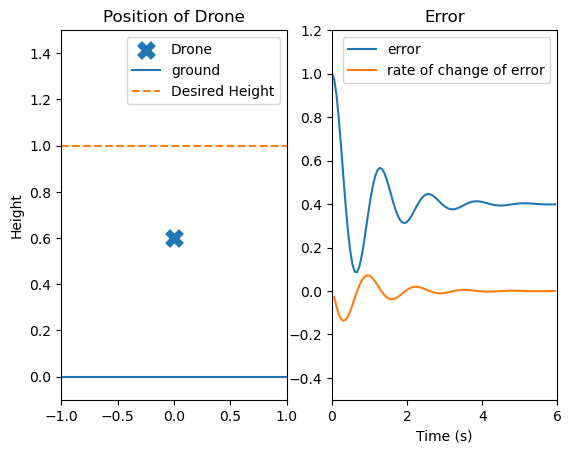

In [32]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Plus Derivative Control of Drone', artist='Matplotlib',
                comment='visualize rate of change of error when using proportional plus derivative control')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig, ax = plt.subplots(1,2)
with writer.saving(fig, "proportional_control_change_error_K15.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y[ii], s=100, marker='x', linewidth=5, label='Drone' )
        ax[0].set_ylim(-0.1,1.5)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].plot(t[0:ii], epsilon[0:ii], label='error')
        ax[1].set_xlim(0,duration)
        ax[1].set_ylim(-0.5,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        if ii > 0:
            ax[1].plot(t[1:ii], epsilon[1:ii]-epsilon[0:ii-1], label='rate of change of error')
        ax[1].legend()
        
        writer.grab_frame()

In [10]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_control_change_error_K15.mp4" type="video/mp4">
</video></div>""")

Note when change in error is big/small, positive/negative.

In [11]:
P = ct.tf(1, [1, 2, 10]) 
Kp = 15
Kd = 10 # 10 #5 #, 2, 1
K_P = ct.tf(Kp,1)
K_PD = ct.tf(Kp,1) + 
T_PD = P*K_PD/(1+P*K_PD)
S_PD = 1/(1+P*K_PD)

T_P = P*K_P/(1+P*K_P)
S_P = 1/(1+P*K_P)

N = 100
duration = 6
t = np.linspace(0,duration,N)
t,y_PD = ct.step_response(T_PD,T=t)
t,epsilon_PD = ct.step_response(S_PD,T=t)

t,y_P = ct.step_response(T_P,T=t)
t,epsilon_P = ct.step_response(S_P,T=t)



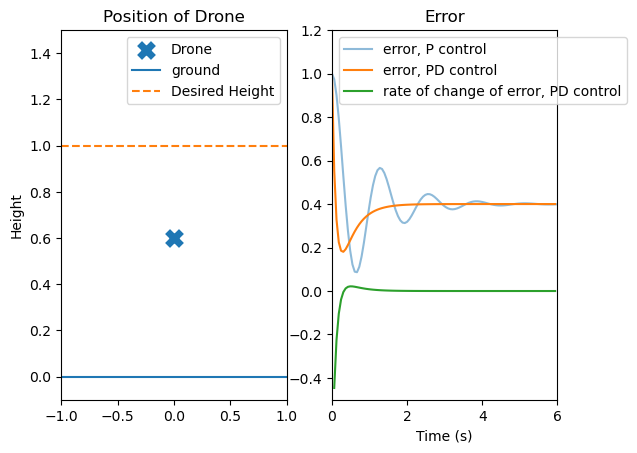

In [8]:
# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Proportional Plus Derivative Control of Drone', artist='Matplotlib',
                comment='visualize rate of change of error when using proportional plus derivative control')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig, ax = plt.subplots(1,2)
with writer.saving(fig, "proportional_plus_derivative_control_change_error_K10.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y_PD[ii], s=100, marker='x', linewidth=5, label='Drone' )
        ax[0].set_ylim(-0.1,1.5)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].plot(t, epsilon_P, alpha=0.5, label='error, P control')
        ax[1].plot(t[0:ii], epsilon_PD[0:ii], label='error, PD control')
        ax[1].set_xlim(0,duration)
        ax[1].set_ylim(-0.5,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        if ii > 0:
            ax[1].plot(t[1:ii], epsilon_PD[1:ii]-epsilon_PD[0:ii-1], label='rate of change of error, PD control')
        ax[1].legend()
        
        writer.grab_frame()

In [11]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_derivative_control_change_error_K1.mp4" type="video/mp4">
</video></div>""")

In [12]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_derivative_control_change_error_K2.mp4" type="video/mp4">
</video></div>""")

In [13]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_derivative_control_change_error_K5.mp4" type="video/mp4">
</video></div>""")

In [14]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="proportional_plus_derivative_control_change_error_K10.mp4" type="video/mp4">
</video></div>""")

# The problem with derivative control - amplification of noise

Text(0.5, 0, 'Time (s)')

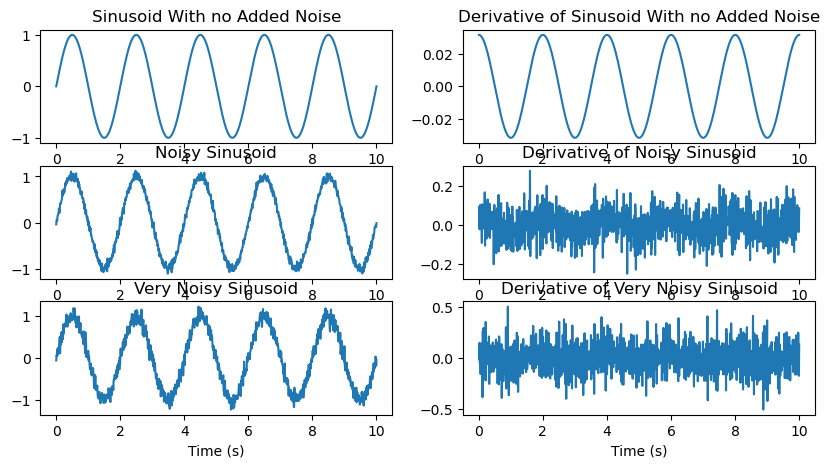

In [78]:
import scipy as sp
import math


N = 1000
duration = 10
f = 0.5

t = np.linspace(0,duration,N)
s = np.sin(2*math.pi*f*t)

s1 = s
ds1 = s1[1:N]-s1[0:N-1]

s2 = s + 0.05*np.random.randn(N)
ds2 = s2[1:N]-s2[0:N-1]

s3 = s + 0.1*np.random.randn(N)
ds3 = s3[1:N]-s3[0:N-1]

fig,ax = plt.subplots(3,2, figsize=(10,5))

ax[0,0].plot(t,s1)
ax[0,0].set_title('Sinusoid With no Added Noise')
ax[0,0].set_xlabel('Time (s)')

ax[0,1].plot(t[1:N],ds1)
ax[0,1].set_title('Derivative of Sinusoid With no Added Noise')
ax[0,1].set_xlabel('Time (s)')

ax[1,0].plot(t,s2)
ax[1,0].set_title('Noisy Sinusoid')
ax[1,0].set_xlabel('Time (s)')

ax[1,1].plot(t[1:N],ds2)
ax[1,1].set_title('Derivative of Noisy Sinusoid')
ax[1,1].set_xlabel('Time (s)')

ax[2,0].plot(t,s3)
ax[2,0].set_title('Very Noisy Sinusoid')
ax[2,0].set_xlabel('Time (s)')

ax[2,1].plot(t[1:N],ds3)
ax[2,1].set_title('Derivative of Very Noisy Sinusoid')
ax[2,1].set_xlabel('Time (s)')


# A Frequency Domain Point of View

C:\Users\arne.dankers2\AppData\Local\Temp\ipykernel_13972\1110550377.py:13: RuntimeWarning: divide by zero encountered in log10
  ax.plot(D_w, 10*np.log10(D_mag), label='Differentiator')


Text(0, 0.5, 'Magnitude (dB)')

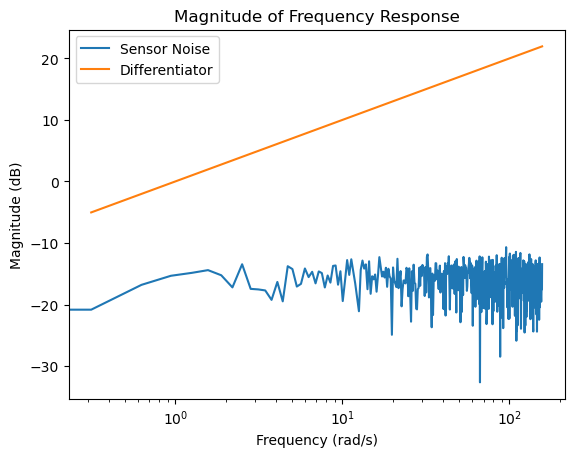

In [68]:
N = 1000
w = sp.fft.fftfreq(N,1/100)*math.pi
n = np.random.randn(N)
NN = abs(sp.fft.fft(n))

D_mag, D_phase, D_w = ct.bode(ct.tf([1, 0], 1), plot=False, omega=w)

fig, ax = plt.subplots(1)
ax.semilogx(w[0:int(N/2)],10*np.log10(NN[0:int(N/2)]/1000), label='Sensor Noise')
ax.plot(D_w, 10*np.log10(D_mag), label='Differentiator')
ax.legend()
ax.set_title('Magnitude of Frequency Response')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')


# A Common Solution - Modified Differentiator

Design a filter that acts like a differentiator in the low frequencies, and is constant in the high frequencies:
$$
\begin{align*}
D = \frac{\omega_D s}{s+\omega_D}
\end{align*}
$$



C:\Users\arne.dankers2\AppData\Local\Temp\ipykernel_13972\1059708400.py:11: RuntimeWarning: divide by zero encountered in log10
  ax.plot(D_w, 10*np.log10(D_mag), label='Differentiator')
C:\Users\arne.dankers2\AppData\Local\Temp\ipykernel_13972\1059708400.py:12: RuntimeWarning: divide by zero encountered in log10
  ax.plot(D_mod_w, 10*np.log10(D_mod_mag), label='Modified Differentiator')


Text(0, 0.5, 'Magnitude (dB)')

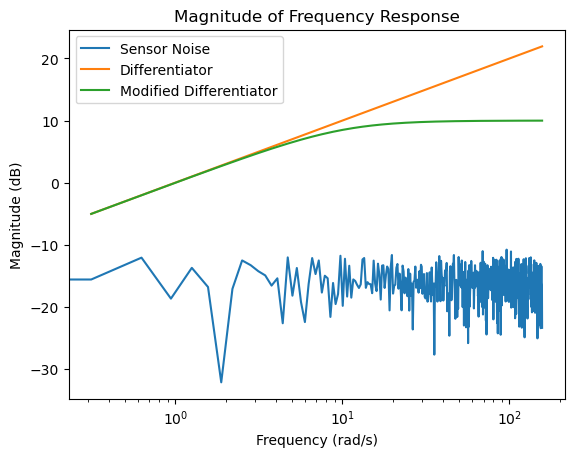

In [92]:
N = 1000
w = sp.fft.fftfreq(N,1/100)*math.pi
n = np.random.randn(N)
NN = abs(sp.fft.fft(n))

D_mag, D_phase, D_w = ct.bode(ct.tf([1, 0], 1), plot=False, omega=w)
D_mod_mag, D_mod_phase, D_mod_w = ct.bode(ct.tf([10, 0], [1, 10]), plot=False, omega=w)

fig, ax = plt.subplots(1)
ax.semilogx(w[0:int(N/2)],10*np.log10(NN[0:int(N/2)]/1000), label='Sensor Noise')
ax.plot(D_w, 10*np.log10(D_mag), label='Differentiator')
ax.plot(D_mod_w, 10*np.log10(D_mod_mag), label='Modified Differentiator')
ax.legend()
ax.set_title('Magnitude of Frequency Response')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')


(1000,)
(1000,)


Text(0.5, 0, 'Time (s)')

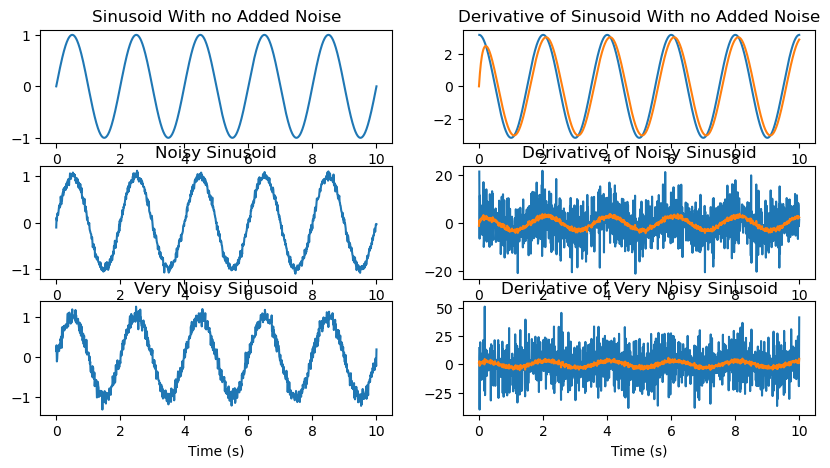

In [100]:
N = 1000
duration = 10
T = duration/N
f = 0.5

t = np.linspace(0,duration,N)
s = np.sin(2*math.pi*f*t)

D_mod = ct.tf([10, 0],[1, 10])
s1 = s
ds1 = (s1[1:N]-s1[0:N-1])/T
tt, d_mod_s1 = ct.forced_response(D_mod,t,s1)

s2 = s + 0.05*np.random.randn(N)
ds2 = (s2[1:N]-s2[0:N-1])/T
tt, d_mod_s2 = ct.forced_response(D_mod,t,s2)

s3 = s + 0.1*np.random.randn(N)
ds3 = (s3[1:N]-s3[0:N-1])/T
tt, d_mod_s3 = ct.forced_response(D_mod,t,s3)

print(d_mod_s1.shape)
print(t.shape)

fig,ax = plt.subplots(3,2, figsize=(10,5))

ax[0,0].plot(t,s1)
ax[0,0].set_title('Sinusoid With no Added Noise')
ax[0,0].set_xlabel('Time (s)')

ax[0,1].plot(t[1:N],ds1)
ax[0,1].plot(t,d_mod_s1)
ax[0,1].set_title('Derivative of Sinusoid With no Added Noise')
ax[0,1].set_xlabel('Time (s)')

ax[1,0].plot(t,s2)
ax[1,0].set_title('Noisy Sinusoid')
ax[1,0].set_xlabel('Time (s)')

ax[1,1].plot(t[1:N],ds2)
ax[1,1].plot(t,d_mod_s2)
ax[1,1].set_title('Derivative of Noisy Sinusoid')
ax[1,1].set_xlabel('Time (s)')

ax[2,0].plot(t,s3)
ax[2,0].set_title('Very Noisy Sinusoid')
ax[2,0].set_xlabel('Time (s)')

ax[2,1].plot(t[1:N],ds3)
ax[2,1].plot(t,d_mod_s3)
ax[2,1].set_title('Derivative of Very Noisy Sinusoid')
ax[2,1].set_xlabel('Time (s)')


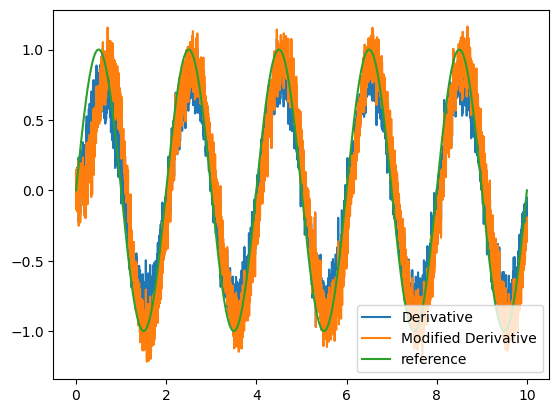

In [27]:
P = ct.tf(1, [1, 2, 10]) 
Kp = 15
Kd = 5 # 10 #5 #, 2, 1

K_PD1 = ct.tf(Kp,1) + ct.tf([Kd*1, 0], [1, 1])
K_PD2 = ct.tf(Kp,1) + ct.tf([Kd, 0], 1)

T_PD1 = P*K_PD1/(1+P*K_PD1)  
S_PD1 = 1/(1+P*K_PD1)

T_PD2 = P*K_PD2/(1+P*K_PD2)
S_PD2 = 1/(1+P*K_PD2)

N = 5000
duration = 10
t = np.linspace(0,duration,N)
n = 0.1*np.random.randn(N)
f = 0.5
s = np.sin(2*np.pi*f*t)
t,y_PD1_r = ct.forced_response(T_PD1,t,s)
t,epsilon_PD1_r = ct.forced_response(S_PD1,t,s)

t,y_PD1_n = ct.forced_response(S_PD1,t,n)
t,epsilon_PD1_n = ct.forced_response(T_PD1,t,n)

t,y_PD2_r = ct.forced_response(T_PD2,t,s)
t,epsilon_PD2_r = ct.forced_response(S_PD2,t,s)

t,y_PD2_n = ct.forced_response(S_PD2,t,n)
t,epsilon_PD2_n = ct.forced_response(T_PD2,t,n)

fig, ax = plt.subplots(1)
ax.plot(t,y_PD2_r + y_PD2_n, label='Derivative')
ax.plot(t,y_PD1_r + y_PD1_n, label='Modified Derivative')
ax.plot(t,s,label='reference')
ax.legend()


# PID Control

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct

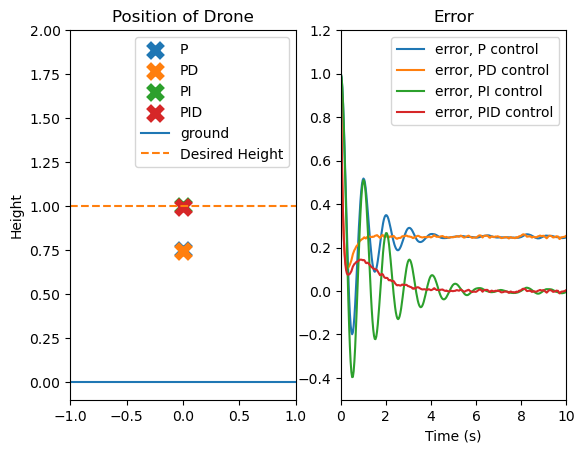

In [10]:
P = ct.tf(1, [1, 2, 10]) 
Kp = 30
Kd = 10 # 10 #5 #, 2, 1
Ki = 30
K_P = ct.tf(Kp,1)
K_PD = ct.tf(Kp,1) + ct.tf([Kd, 0], 1) 
K_PID = ct.tf(Kp,1) + ct.tf([Kd, 0], 1) + ct.tf([Ki], [1, 0])
K_PI = ct.tf(Kp,1) + ct.tf([Ki], [1, 0])
 
T_PD = P*K_PD/(1+P*K_PD)
S_PD = 1/(1+P*K_PD)

T_P = P*K_P/(1+P*K_P)
S_P = 1/(1+P*K_P)

T_PI = P*K_PI/(1+P*K_PI)
S_PI = 1/(1+P*K_PI)

T_PID = P*K_PID/(1+P*K_PID)
S_PID = 1/(1+P*K_PID)

N = 300
duration = 10
t = np.linspace(0,duration,N)
n = 0.01*np.random.randn(N)
f = 0.5
#s = np.sin(2*np.pi*f*t)
s = np.ones(N)

t,y_P_r = ct.forced_response(T_P,t,s)
t,epsilon_P_r = ct.forced_response(S_P,t,s)
t,y_P_n = ct.forced_response(S_P,t,n)
t,epsilon_P_n = ct.forced_response(T_P,t,n)
y_P = y_P_r + y_P_n
epsilon_P = epsilon_P_r + epsilon_P_n

t,y_PD_r = ct.forced_response(T_PD,t,s)
t,epsilon_PD_r = ct.forced_response(S_PD,t,s)
t,y_PD_n = ct.forced_response(S_PD,t,n)
t,epsilon_PD_n = ct.forced_response(T_PD,t,n)
y_PD = y_PD_r + y_PD_n
epsilon_PD = epsilon_PD_r + epsilon_PD_n

t,y_PI_r = ct.forced_response(T_PI,t,s)
t,epsilon_PI_r = ct.forced_response(S_PI,t,s)
t,y_PI_n = ct.forced_response(S_PI,t,n)
t,epsilon_PI_n = ct.forced_response(T_PI,t,n)
y_PI = y_PI_r + y_PI_n
epsilon_PI = epsilon_PI_r + epsilon_PI_n

t,y_PID_r = ct.forced_response(T_PID,t,s)
t,epsilon_PID_r = ct.forced_response(S_PID,t,s)
t,y_PID_n = ct.forced_response(S_PID,t,n)
t,epsilon_PID_n = ct.forced_response(T_PID,t,n)
y_PID = y_PID_r + y_PID_n
epsilon_PID = epsilon_PID_r + epsilon_PID_n


#fig, ax = plt.subplots(1)
#ax.plot(t,y_P_r + y_P_n, label='P')
#ax.plot(t,y_PD_r + y_PD_n, label='PD')
#ax.plot(t,y_PI_r + y_PI_n, label='PI')
#ax.plot(t,y_PID_r + y_PID_n, label='PID')
#ax.plot(t,s,label='reference')
#ax.legend()


# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='PID Control of Drone', artist='Matplotlib',
                comment='visualize rate of change of error when using pid control')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig, ax = plt.subplots(1,2)
with writer.saving(fig, "pid_control.mp4", 100):
    for ii in range(N):
        ax[0].clear()
        ax[0].scatter(0, y_P[ii], s=100, marker='x', linewidth=5, label='P' )
        ax[0].scatter(0, y_PD[ii], s=100, marker='x', linewidth=5, label='PD' )
        ax[0].scatter(0, y_PI[ii], s=100, marker='x', linewidth=5, label='PI' )
        ax[0].scatter(0, y_PID[ii], s=100, marker='x', linewidth=5, label='PID' )
        ax[0].set_ylim(-0.1,2)
        ax[0].set_xlim(-1,1)
        ax[0].set_title('Position of Drone')
        ax[0].set_ylabel('Height')
        ax[0].plot([-1,1], [0, 0], label='ground')
        ax[0].plot([-1, 1], [1, 1], '--', label='Desired Height')
        ax[0].legend()
        ax[1].clear()
        ax[1].plot(t[0:ii], epsilon_P[0:ii], label='error, P control')
        ax[1].plot(t[0:ii], epsilon_PD[0:ii], label='error, PD control')
        ax[1].plot(t[0:ii], epsilon_PI[0:ii], label='error, PI control')
        ax[1].plot(t[0:ii], epsilon_PID[0:ii], label='error, PID control')
        ax[1].set_xlim(0,duration)
        ax[1].set_ylim(-0.5,1.2)
        ax[1].set_title('Error')
        ax[1].set_xlabel('Time (s)')
        ax[1].legend()
        
        writer.grab_frame()


In [15]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="pid_control.mp4" type="video/mp4">
</video></div>""")

# PID Control Design Steps

1. Evaluate the performance of the open loop system to determine how much improvement in transient response is required
2. Design a P controller to meet transient response specifications. If transient response characteristics cannot be met, try a PD controller. Otherwise, proceed to the next step.
3. If there is significant steady state error to the input of interest (step, ramp, parabola) add integral action. Increase integral action until desired steady state behavior is achieved while monitoring transient response characteristics.


# Interesting Point of view:

- Proportional control: basing control action on current error
- Integral control: basing control action on past errors
- Derivative control: basing control action on prediction of future errors